### **"Task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth."** 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/SampleSuperstore.csv')

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9977, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe().T.style.background_gradient(subset=['25%','75%'], cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.000000,55190.379428,32063.693350,1040.000000,23223.000000,56430.500000,90008.000000,99301.000000
Sales,9994.000000,229.858001,623.245101,0.444000,17.280000,54.490000,209.940000,22638.480000
Quantity,9994.000000,3.789574,2.225110,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9994.000000,0.156203,0.206452,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9994.000000,28.656896,234.260108,-6599.978000,1.728750,8.666500,29.364000,8399.976000


***Handling the missing values***

In [ ]:
df.isna().sum()

Ship Mode          0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
Profit Margin %    0
dtype: int64

### **Exploratory Data Analysis: Superstore 2.0**

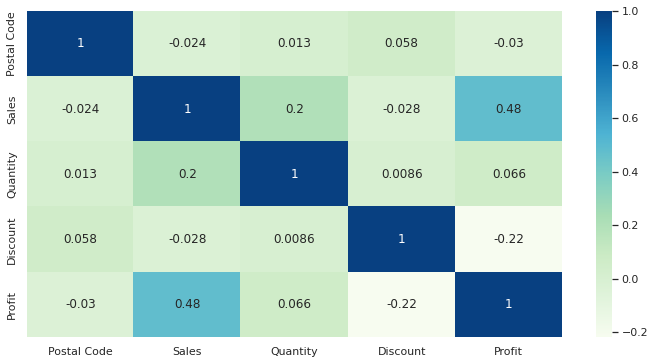

In [ ]:
plt.figure(figsize=(12,6))
corr=df.corr()
sns.set_theme(style="white")
heatmap=sns.heatmap(corr,annot=True,cmap="GnBu")

**Find out whether there is duplicate data.**

In [ ]:
df.duplicated().sum()

17

**Drop the duplicated rows**

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(9977, 13)

In [ ]:
df['Profit Margin %']=(df.Profit / df.Sales)*100

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9977,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9977,3,Consumer,5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9977,1,United States,9977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9977,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9977,49,California,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9977.0,NaN,NaN,NaN,55154.964117,32058.266816,1040.0,23223.0,55901.0,90008.0,99301.0
Region,9977,4,West,3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9977,3,Office Supplies,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9977,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9977.0,NaN,NaN,NaN,230.148902,623.721409,0.444,17.3,54.816,209.97,22638.48


**You will see ‘NaN’ in some of the categorical columns and that’s perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.**

**What we want to focus is the unique count and frequency of the categorical features such as**

***There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.**

***The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.**

**While for numerical parameters, it’s interesting to note that the**

***75% of orders makes at least 36% profit margin.**

***Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.**

***Which Category is Best Selling and Most Profitable?***

In [ ]:
df1=pd.DataFrame(df.groupby(['Category'])[['Sales','Profit','Quantity']].sum())
df1

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


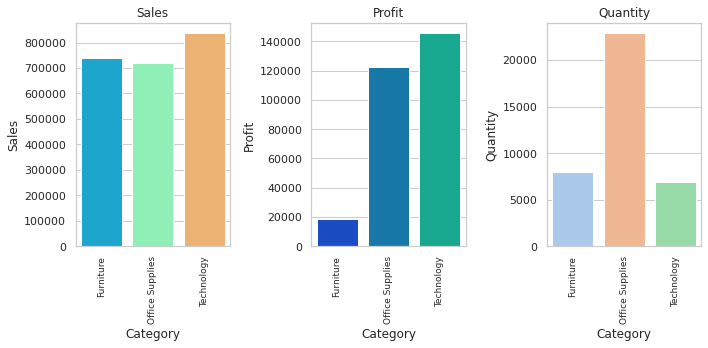

In [ ]:
sns.set_theme(style='whitegrid')
figure,axis=plt.subplots(1,3,figsize=(10,5))
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "winter")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "pastel")
cat1.set(title='Sales')
cat2.set(title='Profit')
cat3.set(title='Quantity')

plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

figure.tight_layout()

In [ ]:
print(cat1.get_xticklabels)

<bound method _AxesBase.get_xticklabels of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8aba85ac10>>


**Our observations are:**
* **All 3 categories — Furniture and Office Supplies were make similar amount of sales but Technology amount of sales was way far***

* **Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.***

* **Furniture is the least profitable and quantity sold are at a minimum too.***

* **Office Supplies sells the most in terms of quantity as it is relatively cheap product.***

**What are the Best Selling and Most Profitable Sub-Category?**

In [ ]:
df2=pd.DataFrame(df.groupby(['Sub-Category'])[['Sales','Profit']].sum())
#Sort in descending order according to profit
subcat_df2=df2.sort_values('Sales',ascending=False)
subcat_df2

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


**Sort in descending order according to profit**

In [ ]:
subcat_profit_df2=df2.sort_values('Profit',ascending=False)
subcat_profit_df2

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


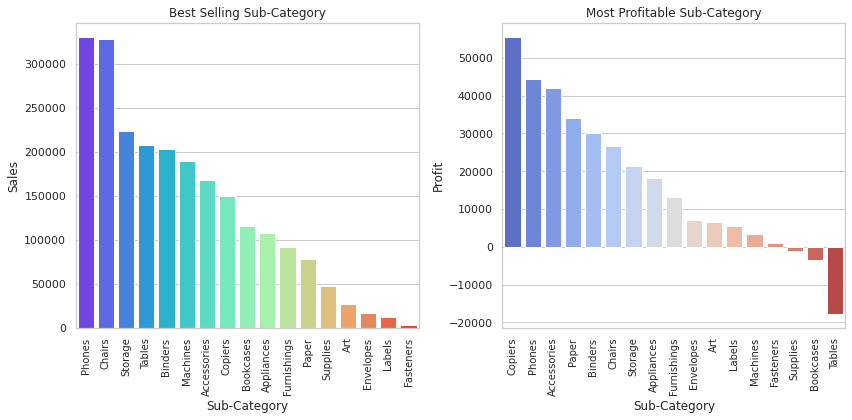

In [ ]:
sns.set_theme(style='whitegrid')
figure,axis=plt.subplots(1,2,figsize=(12,6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2=sns.barplot(data=subcat_profit_df2,x=subcat_profit_df2.index, y=subcat_profit_df2.Profit,ax=axis[1],palette="coolwarm")
subcat2.set(title="Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation="vertical",size=10)
figure.tight_layout()
plt.show()

**Let’s analyse the bar plots:
Phones and Chairs are Top 2 best selling sub-category.**



*   **Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.**
* **On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.**




***Which is the Top Selling Sub-Category?***

In [ ]:
df3=pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
df3

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


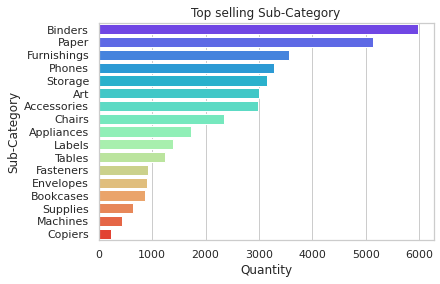

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df3, y=df3.index,x=df3.Quantity,palette="rainbow")
plt.title("Top selling Sub-Category")
plt.show()

**Here, we can deduce that**
*   **Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.**
*   **Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.**



***Which Customer Segment is Most Profitable?***


In [ ]:
df4=pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
df4

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


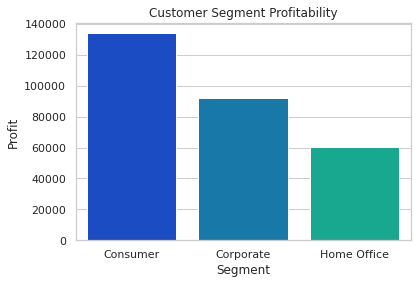

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df4,x=df4.index,y=df4.Profit,palette="winter")
plt.title("Customer Segment Profitability")
plt.show()

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

***Which is the Preferred Ship Mode?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


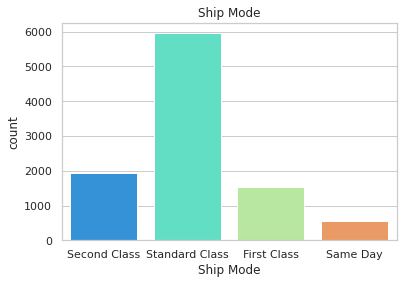

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(df['Ship Mode'],palette="rainbow")
plt.title("Ship Mode")
plt.show()

**Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.**

***Which Region is the Most Profitable?***

In [ ]:
df5=pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
df5

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


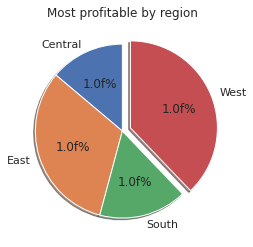

In [ ]:
plt.pie(df5.Profit,labels=df5.Region,startangle=90,explode=[0,0,0,0.1],autopct="1.0f%%",shadow=True)
plt.title("Most profitable by region")
plt.show()

**East and West region are most profitable**

***Which City has the Highest Number of Sales?***




In [ ]:
city_sales_df=pd.DataFrame(df.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending=False))
top10=city_sales_df[:10]
top10

<ipython-input-36-8d11d863b2d1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales_df=pd.DataFrame(df.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending=False))


,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [ ]:
bottom10=city_sales_df[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


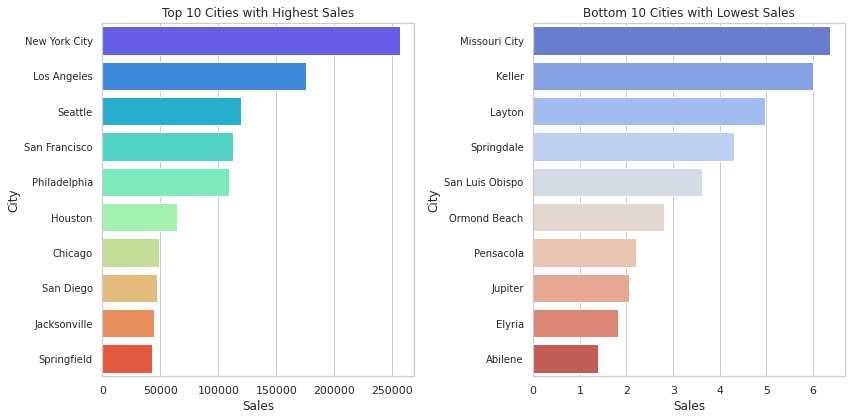

In [ ]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))

sns.set_theme(style="whitegrid")


top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "rainbow", ax = axis[0])
top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots

figure.tight_layout()
plt.show()

The above left bar garph shows the top 10 cities and right side shows the bottom 10 cities
There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

**Recommendations : -
Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.**

**Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.**

**For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.**

**For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.**

**Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.**